

#### 我查询了泰坦尼克号的文档和影视资料，得知灾难发生时许多游客发扬了绅士精神，老弱妇女儿童先行，现在想通过数据探究一下几个问题：
>1 幸存者的性别是否影响了幸存几率(女性更容易幸存)

>2 幸存者中是否是儿童得到更多的幸存机会

In [42]:
% matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as pltt
titanic_data=pd.read_csv("/Users/peng/P4/titanic-data.csv") #修改为自己的文件路径

In [43]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


#### Cabin和Age，Embarked 存在空缺值，要对数据进行处理


In [44]:
#观察总数据
titanic_data.info()
# noise_df = pd.DataFrame(np.random.random(titanic_data.shape),columns=titanic_data.columns)

titanic_data["count"]=1#对原始数据添加一列，方便统计人数
titanic_data.pop('Cabin')
titanic_data=titanic_data.dropna(axis=0,how='any')
#对Age变量进行分组 0-90，每10岁为一组
bins=np.arange(0,90,10)
titanic_data['Age_group']=pd.cut(titanic_data['Age'],bins)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


#### 将原始总数据进行了初步加工，对Age变量进行分组 0-90，每10岁为一组，添加了count列用于统计人数，删除了Cabin列，因为船舱等级与本次数据探究无关，删除了部分有空缺无数据的行

In [45]:
#计算总体幸存率
titanic_count=titanic_data['count'].count()
survived_count=titanic_data.groupby('Survived')['count'].count()
survived_percent=(survived_count/titanic_count)

In [46]:
titanic_data.groupby(['Sex','Survived'])['Survived'].count().unstack().plot(kind='bar',stacked='True')

#### 可以看出来在男性和女性幸存比例中，女性明显高于男性

In [47]:
survive_titanic_data=titanic_data.groupby('Survived').get_group(1)
survive_sex_data=survive_titanic_data.groupby('Sex')['count'].count()
#将数据进行分组 取出幸存者
ax=survive_sex_data.plot(kind='pie',autopct='%.0f%%')
ax.set_ylabel('percent')
ax.set_title("Survived_groupby_Sex")


Text(0.5,1,u'Survived_groupby_Sex')

#### 具体数据表明，幸存者中68%是女性，男性占比32%

Text(0.5,1,u'count_groupby_Age')

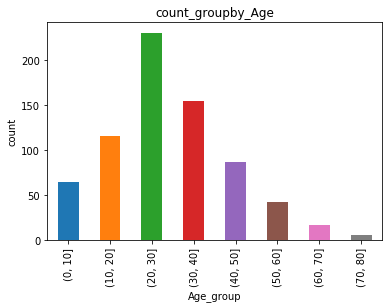

In [48]:
a=titanic_data.groupby("Age_group")['count'].count()
a.index.rename('Age_group',inplace=True)
ax=a.plot(kind='bar',)
ax.set_ylabel('count')

ax.set_title("count_groupby_Age")

#### 各年龄段人口分布图，发现60-70,70-80人口总数太少，由于样本过少，对其进行分析说服力不足，故忽略60-70 ，70-80这2个年龄段的数据分析结果

Text(0.5,1,u'Survived_groupby_Age')

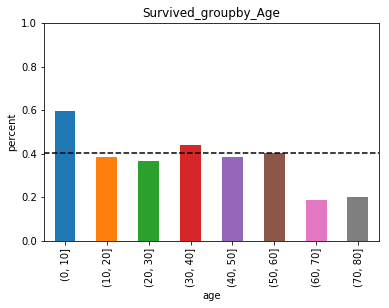

In [49]:
a=titanic_data.groupby("Age_group")['Survived'].mean()
a.index.rename('age',inplace=True)
ax=a.plot(kind='bar',)
ax.set_ylabel('percent')
ax.set_ylim(0,1)
ax.axhline(survived_percent[1], c='black', ls='--')# -- 标记出总体幸存比例
ax.set_title("Survived_groupby_Age")

#### 0-10岁儿童幸存比例最高 ，其次是30-40 ，在其次50-60.

In [50]:
ax=titanic_data.groupby(["Age_group","Sex"])['Survived'].mean().unstack().plot(kind='bar')
ax.set_ylabel('percent')
ax.set_ylim(0,1)
ax.set_title("Survived_groupby_Age&Sex")
ax.axhline(survived_percent[1], c='black', ls='--')# -- 标记出总体幸存比例



#### 明显看出女性在每个年龄段幸存比例都比男性高，而且都高出了总体幸存比例，只有0-10岁儿童在男女性别都得到较高的生存比例

# 泰坦尼克号人员数据分析报告

### 作者：peng

> 项目背景：选取了泰坦尼克号上人员数据进行分析，研究幸存几率是否与性别有关，是否与年纪有关。

> 结论： 幸存者中，女性占大多数，得出女性更容易幸存，
   总体来看，还是0-10岁儿童获得了最高的幸存几率，其次是30-40岁人，第三是50-60的老年人。女性中50-60老年人幸存比例最高（60-80人数太少，忽略这2个年龄段分析结果），在男性中是0-10儿童最高,最后结论如下：
   
     >1 幸存者的性别影响了幸存几率(女性更容易幸存)

     >2 幸存者中儿童得到更多的幸存机会

## 本次分析调查并不能推广，因为我们拿到的是只有不到1000人的数据，并不是全部游客的数据，而且数据内容不完全完整，部分含有空缺值的已经被删除，这有可能影响整体调查结果。